## Making plots

This notebook is to use the ranked riders data to make plots to visualize the selected rider's ranking.  
Using Matplotlib, Numpy and Seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
file_path = '../src/ranked/ranked.csv'

# Read the CSV file into a DataFrame
ranked_dataframe = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(ranked_dataframe.head())

                       Namn            Klubb     #         Klass  \
0  Simon Hopander Ankarhake     Nyköpings MS   304  Motion 16-29   
1            Sören Fransson         Kinds MK  1236  Motion 50-59   
2            Niklas Persson     Karlskoga EK    28        Senior   
3            Rikard Hansson         Tibro MK    73        Senior   
4            Jimmy Ivarsson  SMK Trollhättan   559  Motion 40-49   

   Rank FMCK Skövde  Rank Töreboda MK  Rank Tidaholms MK  Rank Carlsborgs MK  \
0               NaN               NaN                NaN                 NaN   
1               NaN               NaN                1.0               161.0   
2               NaN               2.0                NaN                 NaN   
3               NaN               3.0                NaN                 2.0   
4               NaN               NaN                NaN                 NaN   

   Rank Tibro MK  Rank Falköpings MK  AvgRank  
0            NaN                 1.0      1.0  
1            N

## Create a bar plot for average rank by class

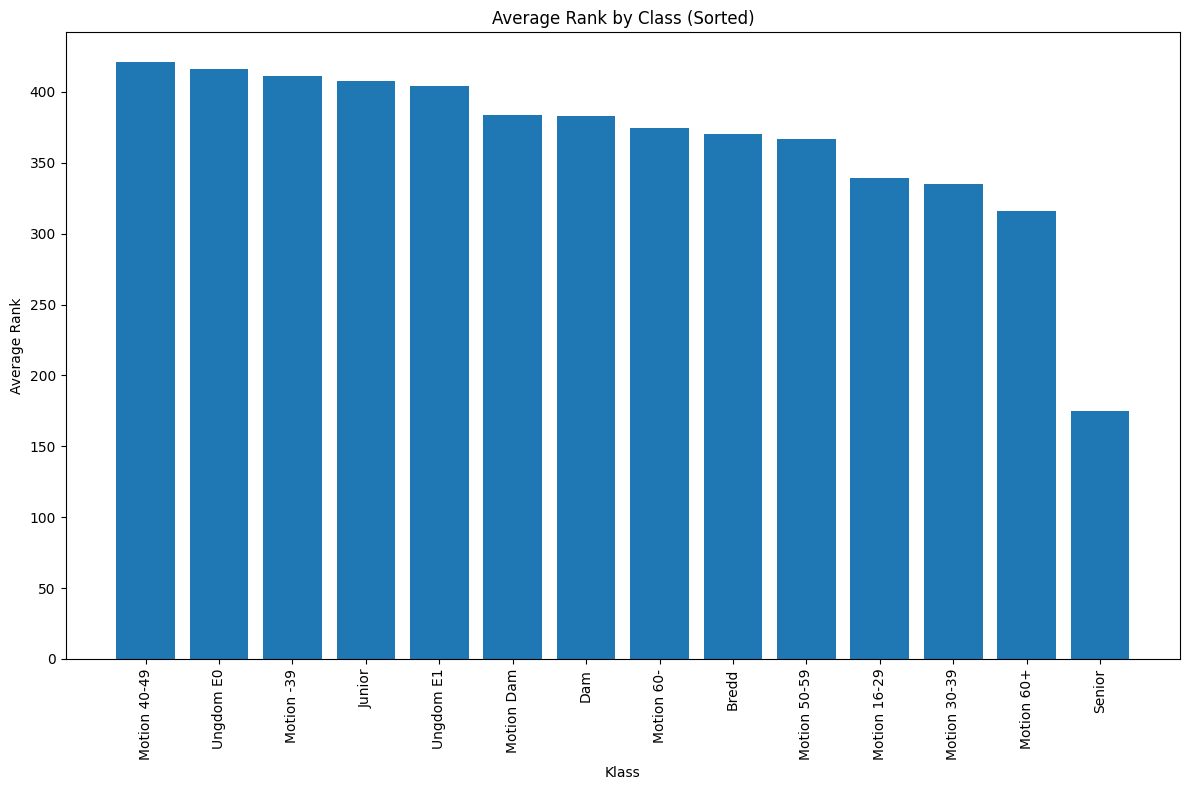

In [4]:
# Sorting the DataFrame by AvgRank in descending order
sorted_df = ranked_dataframe.sort_values('AvgRank', ascending=False)

# Plotting AvgRank against Klass
plt.figure(figsize=(12, 8))
plt.bar(sorted_df['Klass'], sorted_df['AvgRank'])
plt.xlabel('Klass')
plt.ylabel('Average Rank')
plt.title('Average Rank by Class (Sorted)')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

## Create a Scatterbox of Ranks

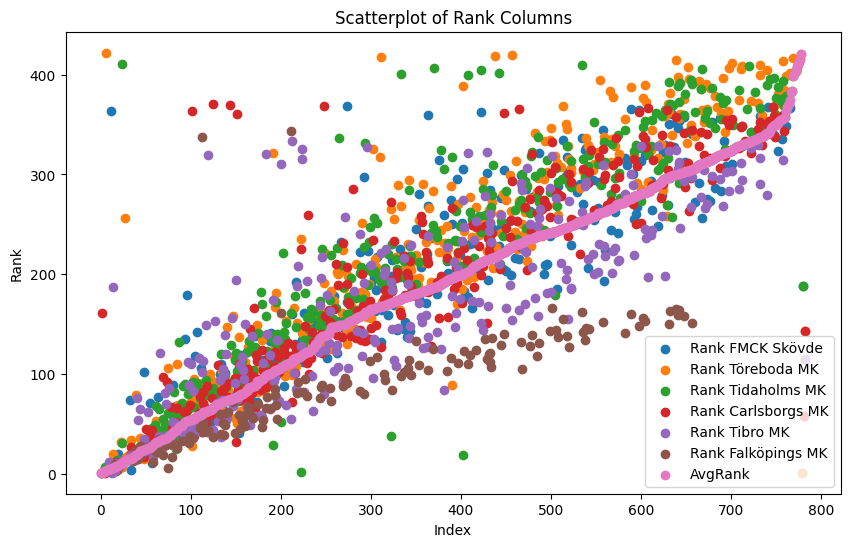

In [5]:
# Filter out columns with 'Rank' in their names
rank_columns = [col for col in ranked_dataframe.columns if 'Rank' in col]

plt.figure(figsize=(10, 6))  # Set the figure size to be 10x6 inches

# Create a scatterplot for all 'Rank' columns
for column in rank_columns:
    plt.scatter(range(len(ranked_dataframe)), ranked_dataframe[column], label=column)

plt.xlabel('Index')
plt.ylabel('Rank')
plt.title('Scatterplot of Rank Columns')
plt.legend()
plt.show()


## Create Histogram

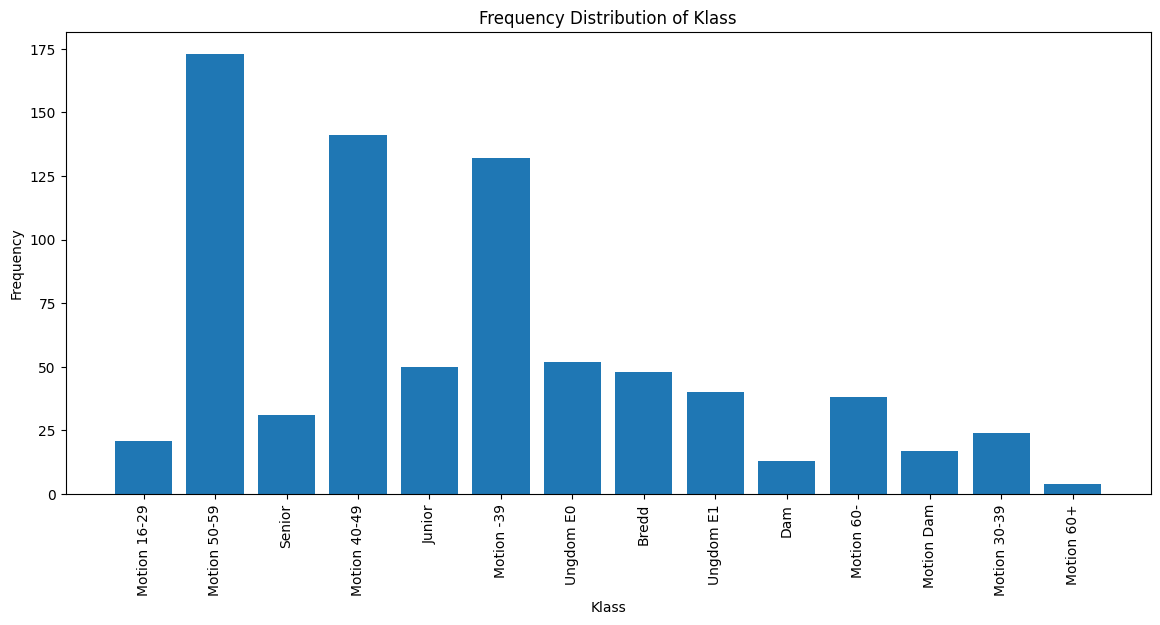

In [6]:
plt.figure(figsize=(14, 6))

# Specify the bins manually
klass_values = ranked_dataframe['Klass']
bins = np.arange(len(klass_values.unique()) + 1) - 0.5

plt.hist(klass_values, bins=bins, rwidth=0.8)  # Adjust rwidth as needed

# Set xticks at the center of each bin
plt.xticks(range(len(klass_values.unique())), klass_values.unique(), rotation=90)

plt.xlabel('Klass')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Klass')
plt.show()


## Create Box Plot

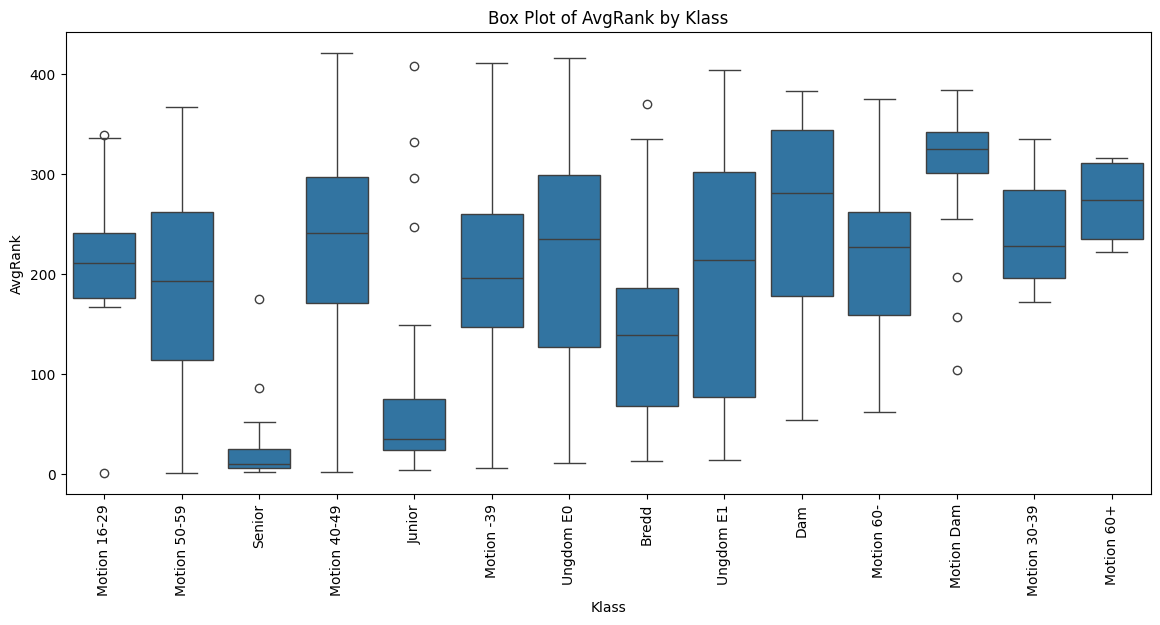

In [7]:
plt.figure(figsize=(14, 6))

# Box plot for 'AvgRank' across 'Klass'
sns.boxplot(x='Klass', y='AvgRank', data=ranked_dataframe)
plt.title('Box Plot of AvgRank by Klass')
plt.xticks(rotation=90)
plt.show()